# NutrIA – Reconnaissance d'aliments avec Deep Learning (Food-101)

Ce notebook a pour objectif de :
- Construire un modèle de deep learning pour reconnaître des aliments à partir d'images.
- Utiliser le *transfer learning* avec un modèle pré-entraîné (MobileNetV2).





In [2]:
!pip install --upgrade pip
!pip install "tensorflow[and-cuda]" tensorflow-datasets matplotlib pandas scikit-learn


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 93.7 MB/s  0:00:05m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 153.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 MB 135.0 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 161.5 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 154.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 109.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 174.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 123.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 154.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 MB 144.5 MB/s  0:00:00 eta 0:00:01
  Created wheel for promise: filename=promise-2.3-py3-none-any.whl si

In [1]:
import tensorflow as tf
print("✅ TensorFlow version:", tf.__version__)
print("🖥️  GPUs disponibles:", tf.config.list_physical_devices("GPU"))


2025-12-07 10:35:26.768332: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-07 10:35:28.303277: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-07 10:35:32.665424: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


✅ TensorFlow version: 2.20.0
🖥️  GPUs disponibles: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


✅ TensorFlow version: 2.20.0
🖥️  GPUs disponibles: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

📥 Chargement du dataset Food-101...



I0000 00:00:1765103746.688204    4802 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:1e.0, compute capability: 7.5


Nombre de classes : 101
Exemples de classes : ['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito']


2025-12-07 10:35:46.995715: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:396] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608
2025-12-07 10:35:49.695115: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence



Aperçu tabulaire (train) :
         id  label_id        label_name
0  sample_0        16        cheesecake
1  sample_1        71            paella
2  sample_2        36           falafel
3  sample_3        89  shrimp_and_grits
4  sample_4        93             steak

🔍 Exemple d'images du dataset :


2025-12-07 10:35:50.078189: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


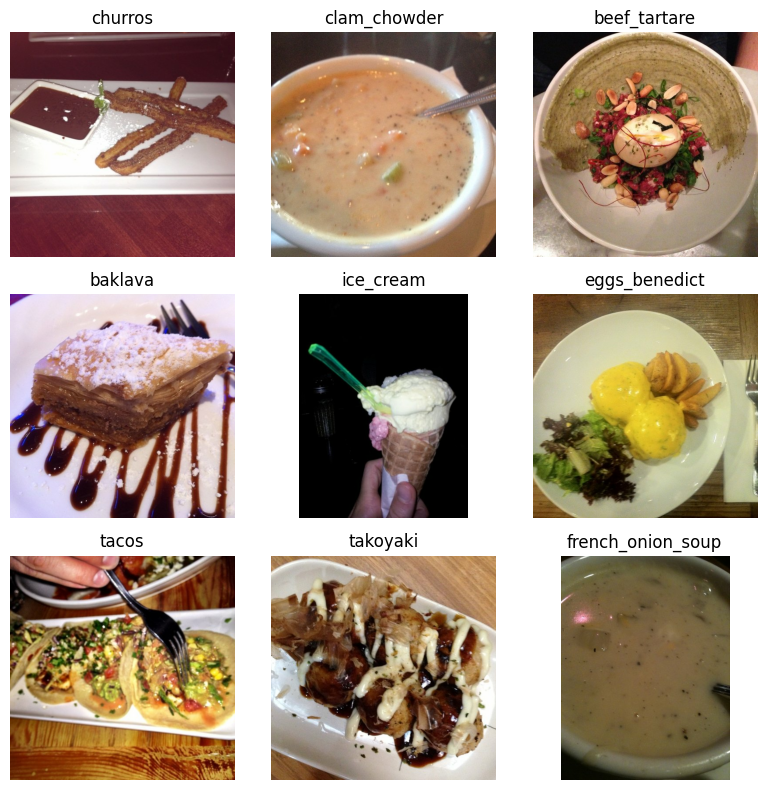


Taille estimée des splits :
Taille train (approx) : 68175
Taille val   (approx) : 7575
Taille test  (TFDS)   : 25250

✅ data_augmentation true

✅ Pipelines tf.data prêts (train / val / test).

🧠 Architecture du modèle (base gelée) :


Model: "CaloriIA_MobileNetV2_frozen"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ avg_pool                        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 101)            │       129,381 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,387,365 (9.11 MB)

 Trainable params: 129,381 (505.39 KB)

 Non-trainable params: 2,257,984 (8.61 MB)


🚀 Entraînement Approche 1 – Feature extraction (base gelée)...
Epoch 1/3


2025-12-07 10:36:09.995638: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:453] ShuffleDatasetV3:216: Filling up shuffle buffer (this may take a while): 482 of 1000
2025-12-07 10:36:12.623576: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:483] Shuffle buffer filled.
2025-12-07 10:36:12.810170: I external/local_xla/xla/service/service.cc:163] XLA service 0x744e0804f720 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-12-07 10:36:12.810202: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2025-12-07 10:36:13.309992: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-12-07 10:36:14.570277: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91002
2025-12-07 10:36:24.562989: E external/local_xla/xla/stream_executor/cuda/cuda_timer.c

2129/2131 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.3921 - loss: 2.5744

2025-12-07 10:41:01.820637: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-07 10:41:01.958969: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-07 10:41:02.101646: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-07 10:41:02.242188: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-07 10:41:02.381809: E external/local_xla/xla/stream_

2131/2131 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.3922 - loss: 2.5740

2025-12-07 10:41:36.965940: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-07 10:41:37.108113: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-07 10:41:37.248691: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-07 10:41:37.384284: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


2131/2131 ━━━━━━━━━━━━━━━━━━━━ 354s 150ms/step - accuracy: 0.4763 - loss: 2.1280 - val_accuracy: 0.5521 - val_loss: 1.7546
Epoch 2/3


2025-12-07 10:41:58.957229: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:453] ShuffleDatasetV3:216: Filling up shuffle buffer (this may take a while): 516 of 1000


   1/2131 ━━━━━━━━━━━━━━━━━━━━ 7:18:26 12s/step - accuracy: 0.5312 - loss: 2.1494

2025-12-07 10:42:01.117860: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:483] Shuffle buffer filled.


2131/2131 ━━━━━━━━━━━━━━━━━━━━ 288s 129ms/step - accuracy: 0.5769 - loss: 1.6588 - val_accuracy: 0.5843 - val_loss: 1.6359
Epoch 3/3


2025-12-07 10:46:46.693550: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:453] ShuffleDatasetV3:216: Filling up shuffle buffer (this may take a while): 579 of 1000


   1/2131 ━━━━━━━━━━━━━━━━━━━━ 7:11:05 12s/step - accuracy: 0.5938 - loss: 1.6192

2025-12-07 10:46:48.672698: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:483] Shuffle buffer filled.


2131/2131 ━━━━━━━━━━━━━━━━━━━━ 294s 132ms/step - accuracy: 0.6067 - loss: 1.5182 - val_accuracy: 0.6059 - val_loss: 1.5190

📈 Courbes d'entraînement – Approche 1 (base gelée) :


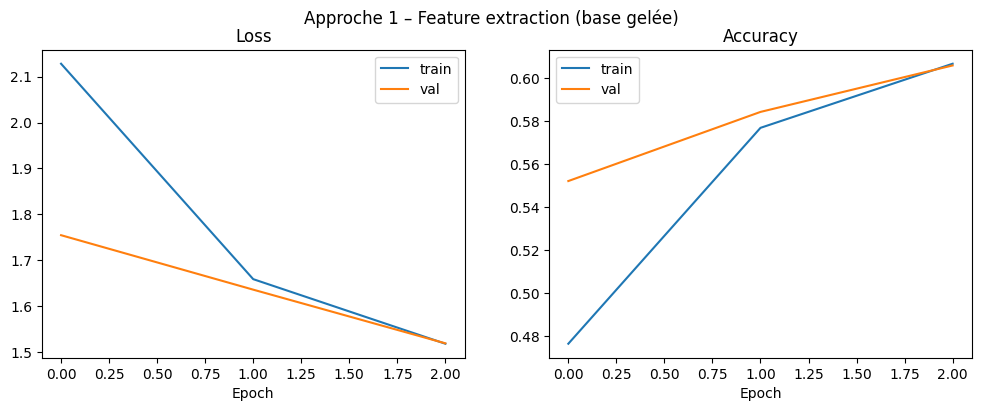


🧪 Évaluation du modèle feature extraction (base gelée) sur le test set...
789/790 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6116 - loss: 1.4774

2025-12-07 10:52:13.903529: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-07 10:52:14.043731: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


790/790 ━━━━━━━━━━━━━━━━━━━━ 47s 59ms/step - accuracy: 0.6124 - loss: 1.4679
✅ Test accuracy (feature extraction) : 0.6124
✅ Test loss    (feature extraction) : 1.4679

🔥 Entraînement Approche 2 – Fine-tuning (base partiellement dégélée)...
Epoch 1/5


2025-12-07 10:52:36.963011: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:453] ShuffleDatasetV3:216: Filling up shuffle buffer (this may take a while): 623 of 1000
2025-12-07 10:52:38.831636: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:483] Shuffle buffer filled.


2131/2131 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.5770 - loss: 1.6546

2025-12-07 10:57:17.382534: W tensorflow/core/kernels/data/prefetch_autotuner.cc:55] Prefetch autotuner tried to allocate 33554688 bytes after encountering the first element of size 33554688 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


2131/2131 ━━━━━━━━━━━━━━━━━━━━ 319s 135ms/step - accuracy: 0.6153 - loss: 1.4800 - val_accuracy: 0.6803 - val_loss: 1.2238
Epoch 2/5


2025-12-07 10:57:46.573093: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:453] ShuffleDatasetV3:216: Filling up shuffle buffer (this may take a while): 519 of 1000


   1/2131 ━━━━━━━━━━━━━━━━━━━━ 7:20:53 12s/step - accuracy: 0.7500 - loss: 0.8339

2025-12-07 10:57:48.793475: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:483] Shuffle buffer filled.


2131/2131 ━━━━━━━━━━━━━━━━━━━━ 297s 134ms/step - accuracy: 0.7104 - loss: 1.0798 - val_accuracy: 0.7312 - val_loss: 1.0134
Epoch 3/5


2025-12-07 11:02:43.681549: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:453] ShuffleDatasetV3:216: Filling up shuffle buffer (this may take a while): 503 of 1000


   1/2131 ━━━━━━━━━━━━━━━━━━━━ 7:22:50 12s/step - accuracy: 0.6562 - loss: 0.9112

2025-12-07 11:02:45.959706: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:483] Shuffle buffer filled.


2131/2131 ━━━━━━━━━━━━━━━━━━━━ 303s 136ms/step - accuracy: 0.7621 - loss: 0.8691 - val_accuracy: 0.7488 - val_loss: 0.9517
Epoch 4/5


2025-12-07 11:07:46.513713: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:453] ShuffleDatasetV3:216: Filling up shuffle buffer (this may take a while): 508 of 1000


   1/2131 ━━━━━━━━━━━━━━━━━━━━ 7:23:29 12s/step - accuracy: 0.8125 - loss: 0.7265

2025-12-07 11:07:48.805813: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:483] Shuffle buffer filled.


2131/2131 ━━━━━━━━━━━━━━━━━━━━ 294s 132ms/step - accuracy: 0.7990 - loss: 0.7206 - val_accuracy: 0.7818 - val_loss: 0.7968
Epoch 5/5


2025-12-07 11:12:40.387834: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:453] ShuffleDatasetV3:216: Filling up shuffle buffer (this may take a while): 589 of 1000
2025-12-07 11:12:42.240453: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:483] Shuffle buffer filled.


2131/2131 ━━━━━━━━━━━━━━━━━━━━ 292s 131ms/step - accuracy: 0.8319 - loss: 0.6074 - val_accuracy: 0.8079 - val_loss: 0.7105

📈 Courbes d'entraînement – Approche 2 (fine-tuning) :


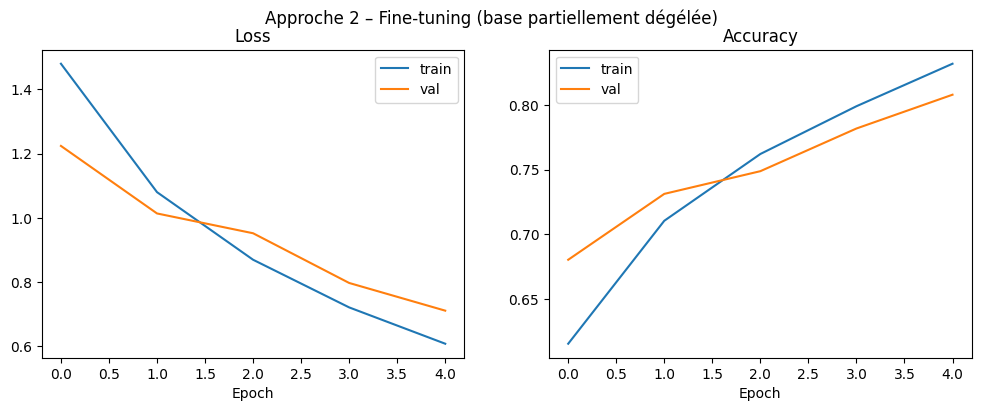


🧪 Évaluation finale sur le test set (modèle fine-tuné)...
790/790 ━━━━━━━━━━━━━━━━━━━━ 40s 50ms/step - accuracy: 0.7221 - loss: 1.0670
✅ Test accuracy (fine-tuned) : 0.7221
✅ Test loss    (fine-tuned) : 1.0670

📊 Récapitulatif test set :
- Baseline (feature extraction) : acc = 0.6124
- Fine-tuning                  : acc = 0.7221

📤 Génération des prédictions sur le test set (pour le rapport de classification)...

📊 Rapport de classification :
                         precision    recall  f1-score   support

              apple_pie       0.46      0.48      0.47       250
         baby_back_ribs       0.85      0.61      0.71       250
                baklava       0.89      0.72      0.79       250
         beef_carpaccio       0.93      0.62      0.75       250
           beef_tartare       0.70      0.64      0.67       250
             beet_salad       0.61      0.50      0.55       250
               beignets       0.81      0.81      0.81       250
               bibimbap       0

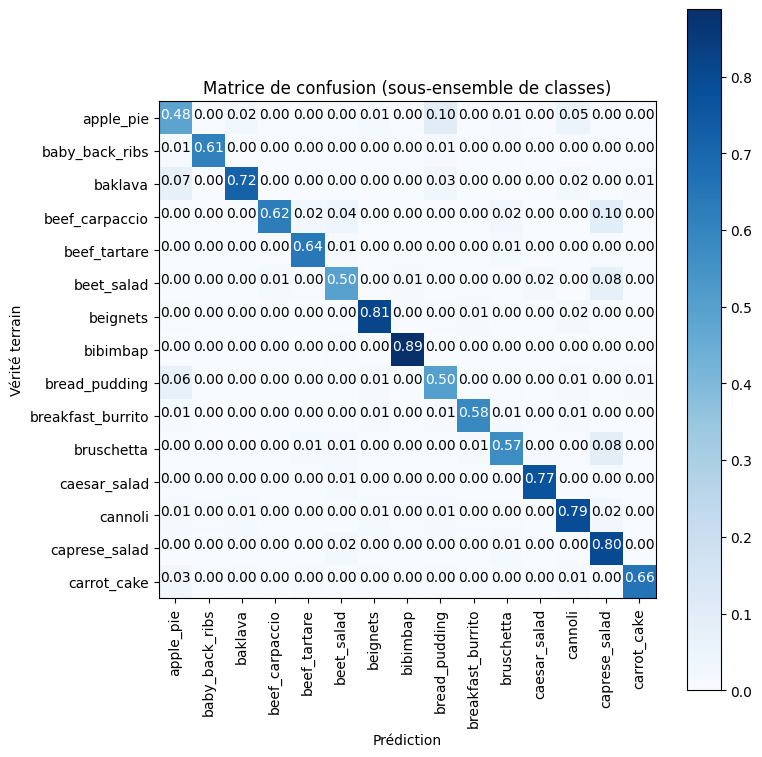

In [2]:

import tensorflow as tf
import tensorflow_datasets as tfds

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras import layers, models

print("✅ TensorFlow version:", tf.__version__)
print("🖥️  GPUs disponibles:", tf.config.list_physical_devices("GPU"))

gpus = tf.config.list_physical_devices("GPU")
for gpu in gpus:
    try:
        tf.config.experimental.set_memory_growth(gpu, True)
    except Exception as e:
        print("⚠️ Impossible de régler memory_growth pour ce GPU :", e)

AUTOTUNE   = tf.data.AUTOTUNE
IMG_SIZE   = (224, 224)
IMG_SHAPE  = IMG_SIZE + (3,)
BATCH_SIZE = 32

print("\n📥 Chargement du dataset Food-101...\n")

(ds_train_raw, ds_test_raw), ds_info = tfds.load(
    "food101",
    split=["train", "validation"],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

class_names = ds_info.features["label"].names
num_classes = len(class_names)

print(f"Nombre de classes : {num_classes}")
print("Exemples de classes :", class_names[:10])


def ds_to_dataframe(ds, max_samples=1000):
    file_ids = []
    labels   = []
    for i, (_, label) in enumerate(ds.take(max_samples)):
        file_ids.append(f"sample_{i}")
        labels.append(int(label.numpy()))
    df = pd.DataFrame({"id": file_ids, "label_id": labels})
    df["label_name"] = df["label_id"].apply(lambda i: class_names[i])
    return df


df_train_preview = ds_to_dataframe(ds_train_raw, max_samples=2000)
print("\nAperçu tabulaire (train) :")
print(df_train_preview.head())


def show_examples(ds, class_names, n=9):
    plt.figure(figsize=(8, 8))
    for i, (image, label) in enumerate(ds.take(n)):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(image.numpy())
        plt.title(class_names[int(label.numpy())])
        plt.axis("off")
    plt.tight_layout()
    plt.show()


print("\n🔍 Exemple d'images du dataset :")
show_examples(ds_train_raw, class_names, n=9)

VAL_RATIO = 0.1

ds_train_size = ds_info.splits["train"].num_examples
val_size = int(VAL_RATIO * ds_train_size)

ds_val   = ds_train_raw.take(val_size)
ds_train = ds_train_raw.skip(val_size)

print("\nTaille estimée des splits :")
print("Taille train (approx) :", ds_train_size - val_size)
print("Taille val   (approx) :", val_size)
print("Taille test  (TFDS)   :", ds_info.splits["validation"].num_examples)

from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

def preprocess_image(image, label):
    image = tf.image.resize(image, IMG_SIZE)
    image = tf.cast(image, tf.float32)
    image = preprocess_input(image)
    return image, label


data_augmentation = tf.keras.Sequential( #enlever rotation et tester meme sans data augmentation
    [
        layers.RandomFlip("horizontal"),
        layers.RandomZoom(0.1),
    ],
    name="data_augmentation",
)

USE_dataAUG = True

def prepare_dataset(ds, training=True):
    ds = ds.map(preprocess_image, num_parallel_calls=AUTOTUNE)
    if training and USE_dataAUG:
        ds = ds.map(
            lambda x, y: (data_augmentation(x, training=True), y),
            num_parallel_calls=AUTOTUNE,
        )
        ds = ds.shuffle(1000)
        print("\n✅ data_augmentation true")
    elif training:
        ds = ds.shuffle(1000)

    ds = ds.batch(BATCH_SIZE)
    ds = ds.prefetch(AUTOTUNE)
    return ds


train_ds = prepare_dataset(ds_train, training=True)
val_ds   = prepare_dataset(ds_val, training=False)
test_ds  = prepare_dataset(ds_test_raw, training=False)

print("\n✅ Pipelines tf.data prêts (train / val / test).")

base_model = tf.keras.applications.MobileNetV2(
    input_shape=IMG_SHAPE,
    include_top=False,
    weights="imagenet",
)

base_model.trainable = False

global_avg_pool   = layers.GlobalAveragePooling2D(name="avg_pool")
prediction_layer  = layers.Dense(num_classes, activation="softmax", name="predictions")

inputs  = tf.keras.Input(shape=IMG_SHAPE)
x       = base_model(inputs, training=False)
x       = global_avg_pool(x)
outputs = prediction_layer(x)

model_frozen = tf.keras.Model(inputs, outputs, name="CaloriIA_MobileNetV2_frozen")

print("\n🧠 Architecture du modèle (base gelée) :")
model_frozen.summary()

initial_lr = 1e-3

model_frozen.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=initial_lr),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

EPOCHS_FROZEN = 3  # à augmenter 

print("\n🚀 Entraînement Approche 1 – Feature extraction (base gelée)...")
history_frozen = model_frozen.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS_FROZEN,
)


def plot_history(history, title="Historique d'entraînement"):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history["loss"], label="train")
    plt.plot(history.history["val_loss"], label="val")
    plt.title("Loss")
    plt.xlabel("Epoch")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history["accuracy"], label="train")
    plt.plot(history.history["val_accuracy"], label="val")
    plt.title("Accuracy")
    plt.xlabel("Epoch")
    plt.legend()

    plt.suptitle(title)
    plt.show()


print("\n📈 Courbes d'entraînement – Approche 1 (base gelée) :")
plot_history(history_frozen, title="Approche 1 – Feature extraction (base gelée)")

print("\n🧪 Évaluation du modèle feature extraction (base gelée) sur le test set...")
test_loss_frozen, test_acc_frozen = model_frozen.evaluate(test_ds)
print(f"✅ Test accuracy (feature extraction) : {test_acc_frozen:.4f}")
print(f"✅ Test loss    (feature extraction) : {test_loss_frozen:.4f}")


base_model.trainable = True

fine_tune_at = len(base_model.layers) - 30

for i, layer in enumerate(base_model.layers):
    if i < fine_tune_at:
        layer.trainable = False
    else:
        layer.trainable = True

model_finetuned = model_frozen

model_finetuned.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)


EPOCHS_FINE = 5  # à augmenter plus tard

print("\n🔥 Entraînement Approche 2 – Fine-tuning (base partiellement dégélée)...")
history_finetune = model_finetuned.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS_FINE,
)

print("\n📈 Courbes d'entraînement – Approche 2 (fine-tuning) :")
plot_history(history_finetune, title="Approche 2 – Fine-tuning (base partiellement dégélée)")

print("\n🧪 Évaluation finale sur le test set (modèle fine-tuné)...")
test_loss, test_acc = model_finetuned.evaluate(test_ds)
print(f"✅ Test accuracy (fine-tuned) : {test_acc:.4f}")
print(f"✅ Test loss    (fine-tuned) : {test_loss:.4f}")

y_true = []
y_pred = []

print("\n📊 Récapitulatif test set :")
print(f"- Baseline (feature extraction) : acc = {test_acc_frozen:.4f}")
print(f"- Fine-tuning                  : acc = {test_acc:.4f}")


print("\n📤 Génération des prédictions sur le test set (pour le rapport de classification)...")
for images, labels in test_ds:
    preds = model_finetuned.predict(images, verbose=0)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)

print("\n📊 Rapport de classification :")
print(classification_report(y_true, y_pred, target_names=class_names))

cm = confusion_matrix(y_true, y_pred)
cm_norm = cm.astype("float") / cm.sum(axis=1, keepdims=True)


def plot_confusion_matrix(cm, class_names, normalize=True, max_classes=15):
    num_classes = min(len(class_names), max_classes)
    cm_plot = cm[:num_classes, :num_classes]
    labels_plot = class_names[:num_classes]

    plt.figure(figsize=(8, 8))
    plt.imshow(cm_plot, interpolation="nearest", cmap=plt.cm.Blues)
    plt.title("Matrice de confusion (sous-ensemble de classes)")
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, labels_plot, rotation=90)
    plt.yticks(ticks=tick_marks, labels=labels_plot)

    fmt = ".2f" if normalize else "d"
    thresh = cm_plot.max() / 2.0
    for i, j in itertools.product(range(cm_plot.shape[0]), range(cm_plot.shape[1])):
        plt.text(
            j,
            i,
            format(cm_plot[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm_plot[i, j] > thresh else "black",
        )

    plt.ylabel("Vérité terrain")
    plt.xlabel("Prédiction")
    plt.tight_layout()
    plt.show()


print("\n📉 Matrice de confusion (normalisée) – 15 premières classes :")
plot_confusion_matrix(cm_norm, class_names, normalize=True, max_classes=15)



In [4]:
import os
import tensorflow as tf

os.makedirs("models", exist_ok=True)

MODEL_PATH = "models/caloriia_mobilenetv2_v2_no_aug.h5"
model_finetuned.save(MODEL_PATH)  # modèle complet en .h5

print(f"✅ Modèle sauvegardé : {MODEL_PATH}")


✅ Modèle sauvegardé : models/caloriia_mobilenetv2_v2_no_aug.h5
